# Project Title - World University Rankings EDA
This project helps you analyze the rankigs of thw world university rankings in a super intelligent and simple way utilizing the power of numpy and pandas to clenup, analyze and draw inference from the data set, not just that, we will also plot some cool charts with matplotlib and seaborn to find deeper meanings in the data.

I would highly recommend taking the full course at [Data Analysis with Python: Zero to Pandas](zerotopandas.com) for you to learn numoy and pandas in a fun and experimental manner. I personally have learbed from there and found it immensely helpful. So please make sure you catch up with that fist.

Cool, together we will unravel what the data is trying to tell us! Lets go!

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

There is plethora of data sets available out there that can be used for your own analysis, Below are some useful links for you to get sample data

https://www.kaggle.com/datasets?fileType=csv

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shaiknaveed88
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 60.7MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './world-university-rankings'

In [5]:
import os
os.listdir(data_dir)

['school_and_country_table.csv',
 'education_expenditure_supplementary_data.csv',
 'cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'timesData.csv',
 'shanghaiData.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "World_University_Rankings_EDA" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'

## Data Preparation and Cleaning

The very first whenever you get a data set to analyze is to check the data for consistency and fullfilment, imagine you are going to prosent something in front of a bunch of people at a school, you got to understand that the audience is school children, so  similar to know your audience, know your data!

In [10]:
import pandas as pd

In [11]:
raw_df = pd.read_csv(data_dir + "/cwurData.csv")

In [12]:
raw_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [13]:
raw_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


The describe method basically describes the data by giving you snapshot of some volumes around the data like the mean, median, mode, count, min, max and standard deviation for each column in the dataset

In [14]:
raw_df.shape

(2200, 14)

lets try to use the shape function to check what is rhe shape of the data meaning total no of rows and columns, here we get to know that the there are 2200 rows and 14 columns in the dataset.

Now, lets dig a little deeper to know more about the data and perform some nice arithmetic operations and other operations, in short Exploratory Data Analysis to get a step closer to see what the data is trying to tell us.

In [15]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'

## Exploratory Analysis and Visualization

Exploratory data analysis as the name suggests means to explore the data and perform analysis and make interpretations  and often draw conclusions

Finding SUM

Lets find the sum of Naional Rank in the data set has, how are we going to do is to use the sum function on the column "national_rank" in the dataframe

In [17]:
sum_col = raw_df['national_rank'].sum()
print("The sum of National ranks is {}" .format(sum_col))

The sum of National ranks is 88612


Finding MEAN

Next, lets find the mean of the narional ranks, we are going to use the mean function for this as below

In [18]:
avg_col = raw_df['national_rank'].mean()
print("The mean/average of National ranks is {}" .format(avg_col))

The mean/average of National ranks is 40.27818181818182


Now, you might be getting is intutively that the arithmetic operation follew a pattern if you look closely to the syntaxes, you are doing just great!

Find the top 10 Universities of the world

Lets now find now try to find the top 10 universities in the world, how are we going to do that?
Well, simply printing out the top 10 universitoes would do it right?, yes but that has to be true when the data is ordered in the manner that the top universities are listed i ascending order of the rankings, thats why it is important to first understand the data, remember Know your data!

In [19]:
raw_df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


Using the head function to know rhe top 10 rows and looking at the world rank column we get to know that the data is indeed ordered according to the top ranked universities to the last.

Hurray! now you know which universities you want to get into.

PIVOT function

Lets try to create a simple pivot table to show the countries and all the universities in them from our data set and also get a sum of patents of by the institutions

In [20]:
pivot_data = raw_df.pivot_table(index = ['country','institution'], values = ['patents'])
pivot_data

patents
country        institution                                      
Argentina      National University of Córdoba              804.0
               National University of La Plata             804.0
               National University of Rosario              737.0
               University of Buenos Aires                  804.0
Australia      Australian National University              314.0
...                                                          ...
United Kingdom University of Ulster                        249.5
               University of Wales, Trinity Saint David    804.0
               University of Warwick                       246.5
               University of York                          443.5
Uruguay        University of the Republic (Uruguay)        804.0

[1024 rows x 1 columns]

Amazing is'nt it the power of pandas, pivot is a simple but powerful tool to analyze great aamount if data in a powerful way

Standard Deviation

Lets find standard deviation of the score of each institution from the score column

In [21]:
std_dev = raw_df['score'].std()
print("The standard deviation of the score of the institutions is {}".format(std_dev))

The standard deviation of the score of the institutions is 7.7608064292896675


Now lets move head aand plot some histograms to see the distributions trends

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Lets plot a histogram to start with

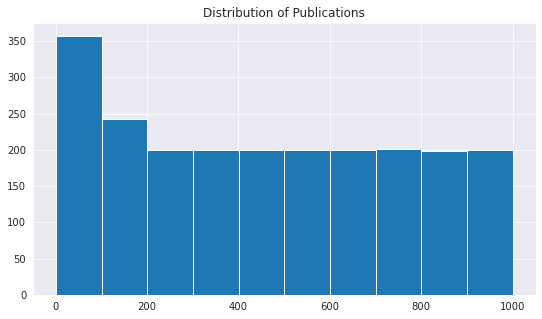

In [23]:
plt.title("Distribution of Publications")
plt.hist(raw_df.publications);

In the above histogram, we get to know the frequency distribution of the publications by all the universities

Multiple histograms

Lets plot a histogram for the publications and citations of all universities present in the data set

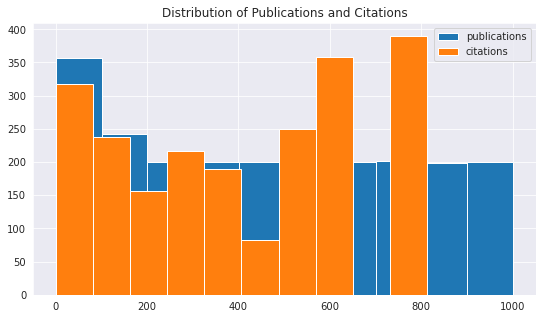

In [24]:
plt.title("Distribution of Publications and Citations")
plt.hist(raw_df.publications);
plt.hist(raw_df.citations);
plt.legend(['publications','citations']);

The interesting thing to note here is that at the start of the bins the publications and citations go almost hand in hand and the publications are the same from biin 200

Scatter Plot

Scatter Plot is also one of the most basic form of the charts to draw useful inferences relatively quickly

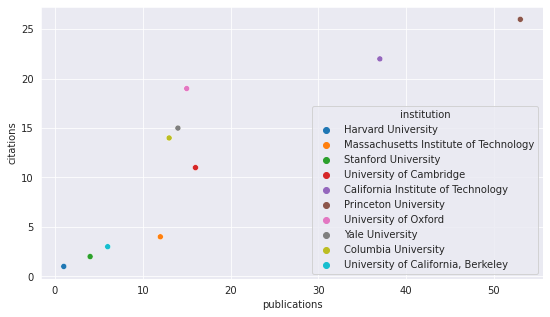

In [25]:
x = raw_df.publications.head(10)
y = raw_df.citations.head(10)
z = raw_df.institution.head(10)
sns.scatterplot(x=x,y=y, hue = z);

Notice that the scatter plot above gives a clue for what university what are the number of cititaions and publications

Lets now plot a line from the points to try to fit in a straight line

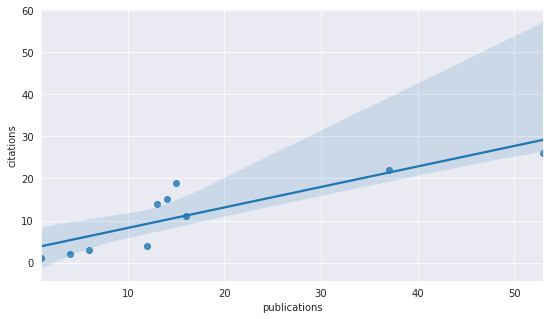

In [26]:
sns.regplot(x=x,y=y);

The straight line that passes between the points gives important relationships

Bar Charts

Now lets try to plot bar charts, we get to know a good clue on the sequence of data from the bar plots and it is one of the most common type os chart used ubiquitously

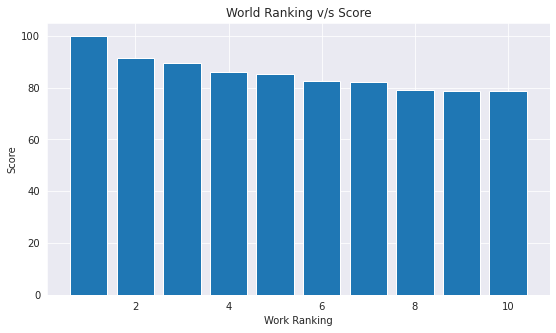

In [27]:
x = raw_df.world_rank.head(10)
y = raw_df.score.head(10)

plt.bar(x,y);
plt.title('World Ranking v/s Score')
plt.xlabel("Work Ranking");
plt.ylabel("Score");

The above chart gives us a good view into the score of the top 10 world ranked universities

Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'

## Asking and Answering Questions

Now that we got a hang of what the data wants to tell us and we learned how to know the data and have a conversion wit it, lets ask some tough and interesting questions



#### Q1: 1. Which country has most universities and also list all institutes present in all countries in the dataset?

In [30]:
most_universities_pivot = raw_df.pivot_table(index = ['country'], values = 'institution',aggfunc='count')
most_universities_pivot                                           

,institution
country,
Argentina,7
Australia,58
Austria,24
Belgium,20
Brazil,36
Bulgaria,2
Canada,72
Chile,8
China,167


Did yiu just see what I have done there, I used the pivot function to get the countries in rows and I wanted the count of institutions/universities, so I took the coulmn of institutions into the vaules argument, now thats just not enough because if you try to run the code you will run into an error, because the column instituions is non numeric.

To counter that we have aggfunc argument to pass where we can specify the aggregator for the values argumant column, here I tiol count and voila! the pivot output is ready and gives us excatky what we want to see, now, would'nt you call that powerful?

Ordering the pivot in descending order to get a good look 

In [31]:
most_universities_pivot = most_universities_pivot.sort_values(["institution"], ascending=False)
most_universities_pivot

,institution
country,
USA,573
China,167
Japan,159
United Kingdom,144
Germany,115
France,109
Italy,96
Spain,81
South Korea,72


We are getting super good at it, see the descending order makes so much sense, now we got to know that USA has most number of universities, followed by China, Japan and UK and India has 31 universities listed in the world ranking universities

#### Q2: Idenfify the Indian Universities rankings and percentage contribution of Indian universities to all universities

In [32]:
Indian_universities = raw_df[raw_df.country == 'India']
Indian_universities

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
527,328,Indian Institute of Technology Delhi,India,1,355,57,210,644,928,800,756.0,426,46.10,2014
635,436,University of Delhi,India,2,263,88,210,701,732,800,769.0,637,45.40,2014
700,501,Indian Institute of Science,India,3,355,478,210,305,495,609,472.0,280,45.11,2014
734,535,Indian Institute of Technology Bombay,India,4,355,478,210,522,785,609,724.0,121,45.00,2014
742,543,Panjab University,India,5,332,212,210,708,722,363,569.0,737,44.97,2014
768,569,Indian Institute of Technology Kanpur,India,6,153,308,210,536,846,609,724.0,227,44.91,2014
773,574,Indian Institute of Technology Kharagpur,India,7,355,201,210,501,966,800,703.0,426,44.89,2014
775,576,Indian Institute of Technology Madras,India,8,355,206,210,532,928,406,756.0,280,44.89,2014
791,592,Tata Institute of Fundamental Research,India,9,355,478,210,458,420,310,523.0,737,44.83,2014
810,611,Indian Institute of Technology Roorkee,India,10,355,307,210,845,846,609,554.0,737,44.79,2014


First, we filter the dataset with 

In [33]:
Indian_universities = Indian_universities.pivot_table(index = ['country'], values = 'institution',aggfunc='count')
Indian_universities

,institution
country,
India,31


In [34]:
Indian_Institutions = 31
Total_Institutions = raw_df['country'].count()
Total_Institutions

2200

In [35]:
Per_calculation = (Indian_Institutions/Total_Institutions)*100

import math

print('The Percentage contribution of Indian Universities to the world universities is about {}%'.format(math.ceil(Per_calculation)))

The Percentage contribution of Indian Universities to the world universities is about 2%


First we got the total universities, which is a simple count of the column institution in the dataset, then we got the count of Indian Universities by again counting but this time with a filter in country India.

The next is a simple calculation of percentage, which is indian universities divided by total unoversities and then printing the answer

#### Q3: Compare National rank and global rank of top 100 universities

In [36]:
USA_univs = raw_df[raw_df.country == 'USA']
USA_univs

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,901,University of Southern Mississippi,USA,225,367,567,218,913,853,812,850.0,676,44.13,2015
2105,906,Oakland University,USA,226,367,567,218,888,810,812,850.0,871,44.13,2015
2112,913,University of North Dakota,USA,227,367,567,218,917,731,812,867.0,606,44.12,2015
2128,929,University of Texas at El Paso,USA,228,367,442,218,910,838,812,906.0,706,44.10,2015


In [66]:
USA_univs_pivot = USA_univs.pivot_table(index=['institution','national_rank','world_rank'])
USA_univs_pivot

alumni_employment  \
institution              national_rank world_rank                      
Albany Medical College   181           623                     478.0   
                         189           650                     567.0   
Arizona State University 46            73                      101.0   
                         52            80                      101.0   
                         55            97                      455.0   
...                                                              ...   
Yale University          6             8                        31.0   
                         8             10                       25.0   
                         9             11                       26.0   
Yeshiva University       75            172                     478.0   
                         76            171                     567.0   

                                                   broad_impact  citations  \
institution              national_rank world_rank                            
Albany Medical College   181           623                605.0      609.0   
                         189           650                579.0      645.0   
Arizona State University 46            73                   NaN       89.0   
                         52            80                   NaN       77.0   
                         55            97                 140.0       76.0   
...                                                         ...        ...   
Yale University          6             8                    NaN       15.0   
                         8             10                  19.0       27.0   
                         9             11                  20.0       35.0   
Yeshiva University       75            172                 94.0      159.0   
                         76            171                109.0      161.0   

                                                   influence  patents  \
institution              national_rank world_rank                       
Albany Medical College   181           623             753.0    737.0   
                         189           650             771.0    720.0   
Arizona State University 46            73              101.0     20.0   
                         52            80              101.0     49.0   
                         55            97               85.0     21.0   
...                                                      ...      ...   
Yale University          6             8                 6.0     66.0   
                         8             10                9.5     43.5   
                         9             11                8.0     49.0   
Yeshiva University       75            172              85.0    138.0   
                         76            171              91.0    128.0   

                                                   publications  \
institution              national_rank world_rank                 
Albany Medical College   181           623                993.0   
                         189           650                893.0   
Arizona State University 46            73                 101.0   
                         52            80                 101.0   
                         55            97                 143.0   
...                                                         ...   
Yale University          6             8                   14.0   
                         8             10                  19.0   
                         9             11                  18.0   
Yeshiva University       75            172                188.0   
                         76            171                195.0   

                                                   quality_of_education  \
institution              national_rank world_rank                         
Albany Medical College   181           623                        142.0   
                         189           650          

Here we have first filtered the data for only those universities which are in USA and got the global and national ranks of those

In [64]:
USA_univs_pivot['publications']

0        3.0
1        2.0
2       17.0
3       11.0
4       11.0
       ...  
545    567.0
546    478.0
547    442.0
548    478.0
549    567.0
Name: alumni_employment, Length: 550, dtype: float64

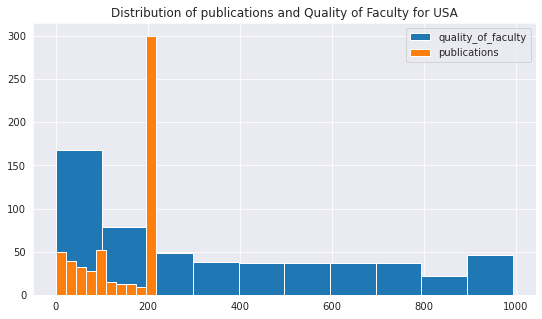

In [71]:
plt.title("Distribution of publications and Quality of Faculty for USA")
plt.hist(USA_univs_pivot.publications);
plt.hist(USA_univs_pivot.quality_of_faculty);
plt.legend(['quality_of_faculty','publications']);

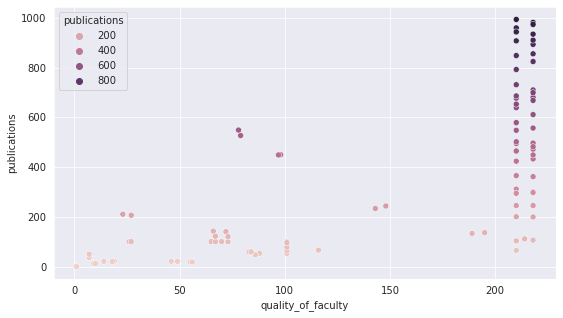

In [77]:
x = USA_univs_pivot.quality_of_faculty.head(100)
y = USA_univs_pivot.publications.head(100)
 
#z = USA_univs_pivot.institution
sns.scatterplot(x=x,y=y, hue = y);

From the above scatter plot we get to know that the higher the quality of faculty more the number of publications in the universities 

#### Q4: Does number of patents define a university ranking?

In [83]:
patents = raw_df.patents
patents

0         5
1         1
2        15
3        50
4        18
       ... 
2195    816
2196    871
2197    824
2198    651
2199    547
Name: patents, Length: 2200, dtype: int64

In [84]:
University_ranking_global = raw_df.world_rank
University_ranking_global

0          1
1          2
2          3
3          4
4          5
        ... 
2195     996
2196     997
2197     998
2198     999
2199    1000
Name: world_rank, Length: 2200, dtype: int64

In [102]:
raw_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [111]:
raw_df.patents

0         5
1         1
2        15
3        50
4        18
       ... 
2195    816
2196    871
2197    824
2198    651
2199    547
Name: patents, Length: 2200, dtype: int64

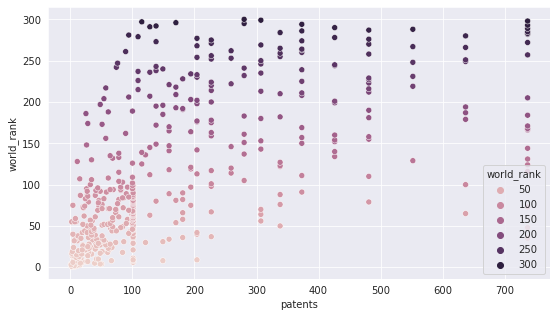

In [108]:
x = raw_df.patents.head(500)
y = raw_df.world_rank.head(500)

#z = USA_univs_pivot.institution
sns.scatterplot(x=x,y=y, hue = y);

We use the same scatter plot to get the info or raltionship between patents and world ranking

If you watch closely, the patents are more clustered towards the bottem left where the ranking is low, but the relationahip cannot be established very aptly

#### Q5: Does country define university ranking? Add country tier to analyze

Does a country define a unversities ranking meaning, if the university is present in some first world country then do the chances of university ranking improve, lets find out

We will plot a scatter plot and also a straight line from it to check it

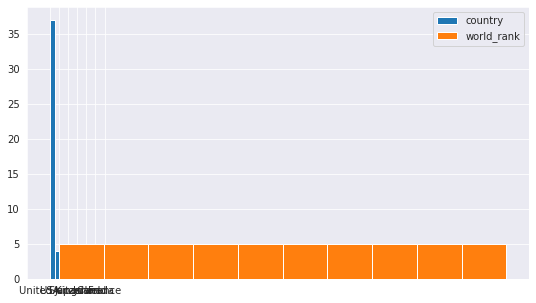

In [123]:
plt.hist(raw_df.country.head(50));
plt.hist(raw_df.world_rank.head(50));
plt.legend(['country','world_rank']);

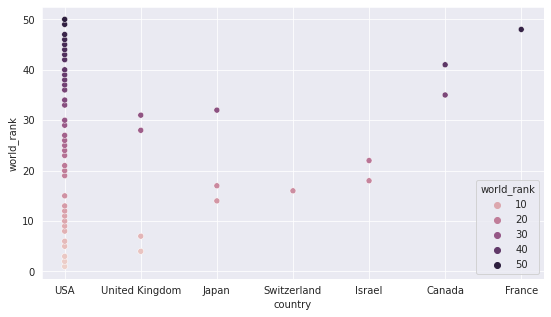

In [124]:
x = raw_df.country.head(50)
y = raw_df.world_rank.head(50)

#z = USA_univs_pivot.institution
sns.scatterplot(x=x,y=y, hue = y);

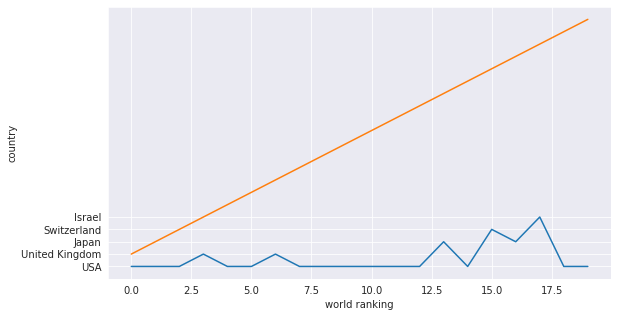

In [129]:
plt.plot(raw_df.country.head(20));
plt.plot(raw_df.world_rank.head(20));
plt.xlabel("world ranking");
plt.ylabel("country");

The above line chart gives a quick view, but the data in the dataset is not enough for drawing a concrete inference

Let us save and upload our work to Jovian before continuing.

In [130]:
import jovian

In [131]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'

## Inferences and Conclusion

We got to know that the pandas and numpy and matplotlib and seaborn are pretty powerful and simple to perform great computations with ease. We got to know some good relations between world ranking and publications and patant, we also got to know that percentage contribution of Indian universities to the world universities and also saw the rankings country wise and got to know that USA has most number of universities in the data set.

In [132]:
import jovian

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'

## References and Future Work

The future work on this data set is that we can perform a deeper analysis to exlpore what more factors contribute to making a university reach the top and also what is required for a university to maintain the ranking.

References
https://www.geeksforgeeks.org/ 
https://pandas.pydata.org/
https://www.kaggle.com/learn/pandas

In [134]:
import jovian

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailmenaveed88/world-university-rankings-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/mailmenaveed88/world-university-rankings-eda


'https://jovian.ai/mailmenaveed88/world-university-rankings-eda'